# Preparacion de base de datos

In [ ]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Revision de la base de datos antigua

In [ ]:
# Cargamos las bases de datos
credit_score_v1=pd.read_excel('/content/Database.xlsx', sheet_name='Prueba 1 (61)')

In [ ]:
credit_score_v1.head()

,Target,Días Máximos en Mora,Score,Rate,Score Sector,Score Preguntas Cerradas,Score Preguntas Abiertas,Sector,¿Cuál es el giro de tu emprendimiento?,¿En qué fase se encuentra el emprendimiento?,...,¿Cuántas veces has cambiado tu número de celular en los últimos dos años?,¿Tienes un vehículo propio?,¿Tienes seguro de salud o seguro de vida?,¿Qué tan comprometida estás con tu emprendimiento?,¿Prefieres trabajar sola o en equipo?,"Si una amiga necesita de tu ayuda, ¿Eligirías parar el emprendimiento 1 semana y ayudarla o no parar y dejar de ayudarla?","Entre las siguientes palabras, ¿con cuál te identificas más?","Entre las siguientes palabras, ¿con cuál te identificas más?.1","Entre las siguientes palabras, ¿con cuál te identificas más?.2","Entre las siguientes palabras, ¿con cuál te identificas más?.3"
0,1,0,0.693633,C,0.657514,0.620370,0.766667,Cuidado de Animales,Comercial,Segmento abundante de clientes,...,Ninguna,No,No,Mucho,En equipo,Parar una semana,Entusiastx,Decididx,Ingeniosx,Confiable
1,0,6,0.696477,C,0.368497,0.622222,0.900000,Belleza y cuidado personal,Producción,Negocio listo para expandirse,...,Ninguna,No,No,Mucho,En equipo,Parar una semana,Entusiastx,Decididx,Arriesgadx,Insistente
2,1,1,0.666150,C,0.731214,0.542593,0.733333,Alimentos y/o bebidas,Producción,Base del negocio - los primeros clientes,...,Ninguna,No,No,Mucho,En equipo,No parar,Lógicx,Decididx,Investigador/a,Confiable
3,1,0,0.711934,B,0.546243,0.564815,0.900000,Ropa e indumentaria,Producción,Segmento abundante de clientes,...,Ninguna,No,Sí,Mucho,Solx,Parar una semana,Metódicx,Decididx,Ingeniosx,Discretx
4,1,0,0.720267,B,0.546243,0.631481,0.866667,Ropa e indumentaria,Comercial,Negocio listo para expandirse,...,Ninguna,No,Sí,Mucho,En equipo,Parar una semana,Entusiastx,Receptivx,Ingeniosx,Confiable


In [ ]:
# revision de registros duplicados
credit_score_v1[credit_score_v1.duplicated()] #todo bien

,Target,Días Máximos en Mora,Score,Rate,Score Sector,Score Preguntas Cerradas,Score Preguntas Abiertas,Sector,¿Cuál es el giro de tu emprendimiento?,¿En qué fase se encuentra el emprendimiento?,...,¿Cuántas veces has cambiado tu número de celular en los últimos dos años?,¿Tienes un vehículo propio?,¿Tienes seguro de salud o seguro de vida?,¿Qué tan comprometida estás con tu emprendimiento?,¿Prefieres trabajar sola o en equipo?,"Si una amiga necesita de tu ayuda, ¿Eligirías parar el emprendimiento 1 semana y ayudarla o no parar y dejar de ayudarla?","Entre las siguientes palabras, ¿con cuál te identificas más?","Entre las siguientes palabras, ¿con cuál te identificas más?.1","Entre las siguientes palabras, ¿con cuál te identificas más?.2","Entre las siguientes palabras, ¿con cuál te identificas más?.3"


In [ ]:
credit_score_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 35 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Target                                                                                                                     61 non-null     int64  
 1   Días Máximos en Mora                                                                                                       61 non-null     int64  
 2   Score                                                                                                                      61 non-null     float64
 3   Rate                                                                                                                       61 non-nu

Creamos una funcion que falicite la revision de los distintos valores que hay en las variables categoricas.

In [ ]:
#funcion para evaluar distintas categorias de una variable
def categorias(database):
  columns=database.columns
  for column in columns:
    values= database[column].value_counts()
    print(values,'\n')

In [ ]:
#revisamos las preguntas cerradas
preguntas_cerradas=credit_score_v1.iloc[:,8:]

categorias(preguntas_cerradas)

Producción    30
Comercial     20
Servicios     11
Name: ¿Cuál es el giro de tu emprendimiento?, dtype: int64 

Negocio listo para expandirse               25
Segmento abundante de clientes              20
Base del negocio - los primeros clientes    16
Name: ¿En qué fase se encuentra el emprendimiento?, dtype: int64 

Sí    54
No     7
Name: ¿Tu emprendimiento tiene fines de lucro?, dtype: int64 

Entre Bs. 1 a Bs. 3.500        33
Entre Bs. 3.501 a Bs. 7.000    19
Más de Bs. 7.000                9
Name: ¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses), dtype: int64 

Más de 2 años       37
Entre 1 y 2 años    21
Menos de 1 año       3
Name: ¿Hace cuánto tiempo existe tu emprendimiento?, dtype: int64 

No esta constituido     32
Unipersonal             21
Regimen simplificado     7
Sociedad civil           1
Name: ¿Qué figura legal tiene tu emprendimiento?, dtype: int64 

Menos de 3 personas    31
3 personas             20
5 personas             10
Name: ¿Cuántas personas co

Se descartan las columnas de la base de datos que no se encuentran en la nueva

In [ ]:
#descartamos las columnas que no se van a utilizar
columnas_irrelevantes=['¿Tu emprendimiento tiene fines de lucro?',
                       '¿Alguna vez sacaste un crédito para tu emprendimiento?',
                       '¿Qué tan comprometida estás con tu emprendimiento?',
                       'Rate', 'Score', 'Score Sector', 'Score Preguntas Cerradas',
                       'Score Preguntas Abiertas']

credit_score_v1=credit_score_v1.drop(columnas_irrelevantes, axis=1)

In [ ]:
# Renombramos columnas para relacionarla con la base de datos nueva
credit_score_v1= credit_score_v1.rename(columns={'¿Qué figura legal tiene tu emprendimiento?':'¿Qué régimen tributario tienes?',
'¿Te has mudado de ciudad en los últimos 5 años?':'¿Te has mudado de ciudad en los últimos 2 años?',
'¿Tienes hijos?': '¿Cuántos hijos tienes?'})

## Revision de la base de datos actual

In [ ]:
credit_score_v2_raw= pd.read_excel('/content/Credit_score v2.0.xlsx', sheet_name='Raw DB')
credit_score_v2_summary= pd.read_excel('/content/Credit_score v2.0.xlsx', sheet_name='Summary')

In [ ]:
#revisamos la base de datos nueva con las preguntas
credit_score_v2_raw.head()

In [ ]:
credit_score_v2_raw[credit_score_v2_raw.duplicated()] #todo OK

,Unnamed: 0,Nombre,Emprendimiento,Codigo,Unnamed: 4,Unnamed: 5,Sector,Preguntas Cerradas,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51


In [ ]:
credit_score_v2_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Nombre             20 non-null     object 
 2   Emprendimiento     20 non-null     object 
 3   Codigo             20 non-null     object 
 4   Capacidad de Pago  20 non-null     int64  
 5   0.05               20 non-null     float64
 6   0.35               20 non-null     float64
 7   0.3                20 non-null     float64
 8   0.3.1              20 non-null     float64
 9   Score              20 non-null     float64
 10  Categoria          20 non-null     object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.8+ KB


In [ ]:
#unimos las 2 hojas de la base de datos actualizada
credit_score_v2=pd.merge(credit_score_v2_summary[['Nombre','Capacidad de Pago']], credit_score_v2_raw, on='Nombre', how='inner')

In [ ]:
credit_score_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre              20 non-null     object 
 1   Capacidad de Pago   20 non-null     int64  
 2   Unnamed: 0          0 non-null      float64
 3   Emprendimiento      20 non-null     object 
 4   Codigo              18 non-null     object 
 5   Unnamed: 4          20 non-null     object 
 6   Unnamed: 5          20 non-null     object 
 7   Sector              20 non-null     object 
 8   Preguntas Cerradas  20 non-null     object 
 9   Unnamed: 8          20 non-null     object 
 10  Unnamed: 9          20 non-null     object 
 11  Unnamed: 10         20 non-null     object 
 12  Unnamed: 11         20 non-null     object 
 13  Unnamed: 12         20 non-null     object 
 14  Unnamed: 13         20 non-null     object 
 15  Unnamed: 14         20 non-null     object 
 16  Unnamed: 1

In [ ]:
credit_score_v2.head()

In [ ]:
#descartamos las columnas con las que no vamos a trabajar, quedandonos solo con las preguntas abiertas/cerradas y datos del emprendimiento

credit_score_v2=credit_score_v2.drop(credit_score_v2.columns[[0, 2, 5, 6, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]], axis=1)

In [ ]:
# renombramos las columnas de la base de datos para poder relacionarlas con la base de datos anterior
columnas_renombre={
    'Codigo': 'Código del Emprendimiento',
    'Preguntas Cerradas':'¿Cuál es el giro de tu emprendimiento?',
    'Unnamed: 8':'¿En qué fase se encuentra el emprendimiento?',
    'Unnamed: 9':'¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses)',
    'Unnamed: 10':'¿Hace cuánto tiempo existe tu emprendimiento?',
    'Unnamed: 11':'¿Cuántas horas le dedicas a tu emprendimiento?',
    'Unnamed: 12': '¿Qué régimen tributario tienes?',
    'Unnamed: 13':'¿Cuántas personas conforman tu equipo?',
    'Unnamed: 14':'¿Cuál es tu edad?',
    'Unnamed: 15': '¿Te has mudado de ciudad en los últimos 2 años?',
    'Unnamed: 16':'¿Cuántos años de experiencia laboral tienes en el sector de tu emprendimiento?',
    'Unnamed: 17':'¿Tienes una cuenta bancaria?',
    'Unnamed: 18':'¿Cuánto ahorras al mes?',
    'Unnamed: 19':'¿Cuál es tu estado civil?',
    'Unnamed: 20':'Vives en:',
    'Unnamed: 21':'¿Cuántos hijos tienes?',
    'Unnamed: 22':'¿Cuál es el nivel máximo de educación que recibiste?',
    'Unnamed: 23':'¿Cuál es tu principal fuente de ingreso?',
    'Unnamed: 24':'¿Cuántas veces has cambiado tu número de celular en los últimos dos años?',
    'Unnamed: 25':'¿Tienes un vehículo propio?',
    'Unnamed: 26':'¿Tienes seguro de salud o seguro de vida?',
    'Unnamed: 27':'¿Prefieres trabajar sola o en equipo?',
    'Unnamed: 28': 'Si una amiga necesita de tu ayuda, ¿Eligirías parar el emprendimiento 1 semana y ayudarla o no parar y dejar de ayudarla?',
    'Unnamed: 29':'Entre las siguientes palabras, ¿con cuál te identificas más?',
    'Unnamed: 30':'Entre las siguientes palabras, ¿con cuál te identificas más?.1',
    'Unnamed: 31':'Entre las siguientes palabras, ¿con cuál te identificas más?.2',
    'Unnamed: 32':'Entre las siguientes palabras, ¿con cuál te identificas más?.3',
    'Preguntas abiertas': 'Explícanos el problema/necesidad/deseo que tu emprendimiento quiere resolver para tus potenciales clientes.',
    'Unnamed: 34':'Explícanos la solución que tu emprendimiento ofrece al problema/necesidad/deseo identificado. ¿Cuáles son los productos o servicios que ofreces? ¿Cómo haces llegar tu solución a tus clientes?',
    'Unnamed: 35':'¿Cuáles son las características de tu segmento de clientes?',
    'Unnamed: 36':'¿Qué te hace diferente a tus competidores? ¿Cuáles son tus fortalezas y debilidades?',
    'Unnamed: 37':'¿Cuál es tu propuesta de valor? ¿Qué beneficios le entregas a tus clientes?',
    'Unnamed: 38':'¿Cuáles son tus metas a largo plazo?',
    'Unnamed: 39':'¿Cómo ves tu emprendimiento en el futuro?',
    'Unnamed: 40':'¿Qué riesgos temes correr con tu emprendimiento?'
    }

credit_score_v2=credit_score_v2.rename(columns=columnas_renombre)

In [ ]:
credit_score_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                           --------------  ----- 
 0   Capacidad de Pago                                                                                                                                                                                20 non-null     int64 
 1   Emprendimiento                                                                                                                                                                                   20 non-null     object
 2   Código d

In [ ]:
credit_score_v2.head()

,Capacidad de Pago,Emprendimiento,Código del Emprendimiento,Sector,¿Cuál es el giro de tu emprendimiento?,¿En qué fase se encuentra el emprendimiento?,¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses),¿Hace cuánto tiempo existe tu emprendimiento?,¿Cuántas horas le dedicas a tu emprendimiento?,¿Qué régimen tributario tienes?,...,"Entre las siguientes palabras, ¿con cuál te identificas más?.2","Entre las siguientes palabras, ¿con cuál te identificas más?.3",Explícanos el problema/necesidad/deseo que tu emprendimiento quiere resolver para tus potenciales clientes.,Explícanos la solución que tu emprendimiento ofrece al problema/necesidad/deseo identificado. ¿Cuáles son los productos o servicios que ofreces? ¿Cómo haces llegar tu solución a tus clientes?,¿Cuáles son las características de tu segmento de clientes?,¿Qué te hace diferente a tus competidores? ¿Cuáles son tus fortalezas y debilidades?,¿Cuál es tu propuesta de valor? ¿Qué beneficios le entregas a tus clientes?,¿Cuáles son tus metas a largo plazo?,¿Cómo ves tu emprendimiento en el futuro?,¿Qué riesgos temes correr con tu emprendimiento?
0,0,Watermelon SRL,NaN,Alimentos y/o bebidas,Comercial,Mi negocio está listo para expandirse,Más de Bs. 7000,Más de 2 años,Más de 8 horas,Régimen simplificado,...,Investigadora,Confiable,1,2,2,2,1,3,3,2
1,600,Hinode - Melina Castro,H001,Belleza y cuidado personal,Comercial,Tengo mis primeros clientes,Entre Bs 1 a Bs 3.500,Menos de 1 año,Entre 4 y 8 horas,Régimen simplificado,...,Arriesgada,Confiable,1,1,2,2,1,1,3,1
2,600,Hinode-Diana Orgaz,H002,Belleza y cuidado personal,Comercial,Tengo un segmento abundante de clientes,Entre Bs 3.501 a Bs 7.000,Más de 2 años,Entre 4 y 8 horas,Régimen simplificado,...,Ingeniosa,Confiable,1,2,2,2,2,1,3,2
3,750,Hinode-Andrea Jaldin Diseños,H003,Belleza y cuidado personal,Comercial,Tengo mis primeros clientes,No tengo ventas,Entre 1 y 2 años,Menos de 4 horas,No pago impuestos,...,Ingeniosa,Confiable,1,2,3,3,2,3,3,2
4,0,Hinode-Emma,H004,Ventas y marketing,Comercial,Tengo mis primeros clientes,Entre Bs 1 a Bs 3.500,Más de 2 años,Menos de 4 horas,No pago impuestos,...,Ingeniosa,Confiable,1,1,2,2,1,1,2,2


## Union de ambas base de datos

In [ ]:
#concatenacion de las bases de datos
credit_score=pd.concat([credit_score_v1, credit_score_v2], ignore_index=True)

credit_score.head()

,Target,Días Máximos en Mora,Sector,¿Cuál es el giro de tu emprendimiento?,¿En qué fase se encuentra el emprendimiento?,¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses),¿Hace cuánto tiempo existe tu emprendimiento?,¿Qué régimen tributario tienes?,¿Cuántas personas conforman tu equipo?,¿Cuál es tu edad?,...,¿Cuántas horas le dedicas a tu emprendimiento?,¿Cuánto ahorras al mes?,Explícanos el problema/necesidad/deseo que tu emprendimiento quiere resolver para tus potenciales clientes.,Explícanos la solución que tu emprendimiento ofrece al problema/necesidad/deseo identificado. ¿Cuáles son los productos o servicios que ofreces? ¿Cómo haces llegar tu solución a tus clientes?,¿Cuáles son las características de tu segmento de clientes?,¿Qué te hace diferente a tus competidores? ¿Cuáles son tus fortalezas y debilidades?,¿Cuál es tu propuesta de valor? ¿Qué beneficios le entregas a tus clientes?,¿Cuáles son tus metas a largo plazo?,¿Cómo ves tu emprendimiento en el futuro?,¿Qué riesgos temes correr con tu emprendimiento?
0,1.0,0.0,Cuidado de Animales,Comercial,Segmento abundante de clientes,Entre Bs. 3.501 a Bs. 7.000,Más de 2 años,No esta constituido,Menos de 3 personas,Entre 26 y 45 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,6.0,Belleza y cuidado personal,Producción,Negocio listo para expandirse,Entre Bs. 1 a Bs. 3.500,Más de 2 años,No esta constituido,3 personas,Entre 18 y 25 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,Alimentos y/o bebidas,Producción,Base del negocio - los primeros clientes,Entre Bs. 3.501 a Bs. 7.000,Menos de 1 año,No esta constituido,3 personas,Entre 26 y 45 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,Ropa e indumentaria,Producción,Segmento abundante de clientes,Entre Bs. 1 a Bs. 3.500,Entre 1 y 2 años,No esta constituido,Menos de 3 personas,Entre 26 y 45 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,Ropa e indumentaria,Comercial,Negocio listo para expandirse,Entre Bs. 3.501 a Bs. 7.000,Más de 2 años,No esta constituido,Menos de 3 personas,Entre 26 y 45 años,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 40 columns):
 #   Column                                                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                                                           --------------  -----  
 0   Target                                                                                                                                                                                           61 non-null     float64
 1   Días Máximos en Mora                                                                                                                                                                             61 non-null     float64
 2   Sect

In [ ]:
#Cambiamos el orden de algunas columnas
column_order= ['Emprendimiento', 'Código del Emprendimiento', 'Target', 'Días Máximos en Mora', 'Capacidad de Pago']
credit_score= credit_score.reindex(columns=column_order + [col for col in credit_score.columns if col not in column_order])


## Revision de base de datos unificada

In [ ]:
credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 40 columns):
 #   Column                                                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                                                           --------------  -----  
 0   Emprendimiento                                                                                                                                                                                   20 non-null     object 
 1   Código del Emprendimiento                                                                                                                                                                        18 non-null     object 
 2   Targ

In [ ]:
# Tomamos una muestra de la base de datos completa que solo contiene las preguntas cerradas
preguntas_cerradas=credit_score.iloc[:,6:32]

# revisamos las preguntas cerradas
categorias(preguntas_cerradas)

Producción    37
Comercial     33
Servicios     11
Name: ¿Cuál es el giro de tu emprendimiento?, dtype: int64 

Negocio listo para expandirse               25
Segmento abundante de clientes              20
Base del negocio - los primeros clientes    16
Tengo mis primeros clientes                 11
Tengo un segmento abundante de clientes      6
Mi negocio está listo para expandirse        3
Name: ¿En qué fase se encuentra el emprendimiento?, dtype: int64 

Entre Bs. 1 a Bs. 3.500        33
Entre Bs. 3.501 a Bs. 7.000    19
Entre Bs 1 a Bs 3.500          13
Más de Bs. 7.000                9
Entre Bs 3.501 a Bs 7.000       3
Más de Bs. 7000                 2
No tengo ventas                 2
Name: ¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses), dtype: int64 

Más de 2 años       48
Entre 1 y 2 años    25
Menos de 1 año       8
Name: ¿Hace cuánto tiempo existe tu emprendimiento?, dtype: int64 

No esta constituido     32
Unipersonal             21
No pago impuestos       12


In [ ]:
# Modificamos algunos registros para que puedan coincidir entre ambas base de datos

credit_score['¿En qué fase se encuentra el emprendimiento?'].replace({
    'Segmento abundante de clientes':'Tengo un segmento abundante de clientes',
    'Negocio listo para expandirse':'Mi negocio está listo para expandirse',
    'Base del negocio - los primeros clientes':'Tengo mis primeros clientes'}, inplace=True)

credit_score['¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses)'].replace({
    'Entre Bs. 3.501 a Bs. 7.000':'Entre Bs 3.501 a Bs 7.000',
    'Entre Bs. 1 a Bs. 3.500': 'Entre Bs 1 a Bs 3.500',
    'Más de Bs. 7.000': 'Más de Bs. 7000'}, inplace=True)

credit_score['¿Qué régimen tributario tienes?'].replace({
    'No esta constituido':'No pago impuestos', 'Unipersonal':'Régimen general',
    'Regimen simplificado':'Régimen simplificado', 'Sociedad civil':'Régimen general'},inplace=True)

credit_score['¿Cuántas personas conforman tu equipo?'].replace({
    'Menos de 3 personas': 'Sólo yo', '5 personas':'Más de 5 personas'},inplace=True)

credit_score['¿Cuántos años de experiencia laboral tienes en el sector de tu emprendimiento?'].replace({
    'Entre 3 a 4 años':'Entre 3 y 4 años', 'Entre 1 a 2 años':'Entre 1 y 2 años'}, inplace=True)

credit_score['¿Cuántos hijos tienes?'].replace(['No tengo', 'No', 'Sí'], [0, 0, 1], inplace=True)

credit_score['¿Prefieres trabajar sola o en equipo?'].replace({'Solx':'Sola'}, inplace=True)

credit_score['Entre las siguientes palabras, ¿con cuál te identificas más?'].replace(['Entusiastx', 'Lógicx', 'Metódicx', 'Rápidx'],
 ['Entusiasta', 'Lógica', 'Metódica', 'Rápida'], inplace=True)

credit_score['Entre las siguientes palabras, ¿con cuál te identificas más?.1'].replace(['Decididx', 'Receptivx', 'Bondadosx', 'Cautelosx'],
 ['Decidida', 'Receptiva', 'Bondadosa', 'Cautelosa'], inplace=True)

credit_score[ 'Entre las siguientes palabras, ¿con cuál te identificas más?.2'].replace(['Ingeniosx', 'Arriesgadx', 'Investigador/a', 'Amenx'],
 ['Ingeniosa', 'Arriesgada', 'Investigadora', 'Amena'], inplace=True)

credit_score[ 'Entre las siguientes palabras, ¿con cuál te identificas más?.3'].replace(['Discretx', 'Encantador/a'],
 ['Discreta', 'Encantadora'], inplace=True)

In [ ]:
#Revisamos si se realizaron los cambios
categorias(credit_score.iloc[:,6:32])

Producción    37
Comercial     33
Servicios     11
Name: ¿Cuál es el giro de tu emprendimiento?, dtype: int64 

Mi negocio está listo para expandirse      28
Tengo mis primeros clientes                27
Tengo un segmento abundante de clientes    26
Name: ¿En qué fase se encuentra el emprendimiento?, dtype: int64 

Entre Bs 1 a Bs 3.500        46
Entre Bs 3.501 a Bs 7.000    22
Más de Bs. 7000              11
No tengo ventas               2
Name: ¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses), dtype: int64 

Más de 2 años       48
Entre 1 y 2 años    25
Menos de 1 año       8
Name: ¿Hace cuánto tiempo existe tu emprendimiento?, dtype: int64 

No pago impuestos       44
Régimen general         22
Régimen simplificado    15
Name: ¿Qué régimen tributario tienes?, dtype: int64 

Sólo yo              46
3 personas           20
Más de 5 personas    13
4 personas            2
Name: ¿Cuántas personas conforman tu equipo?, dtype: int64 

Entre 26 y 45 años    61
Entre 18 y 25 años

Se puede observar datos interesantes como por ejemplo: (Casi) todos los emprendedores disponen de cuenta bancaria, vehiculo propio, seguro de vida, prefieren trabajar en equipo y su emprendimiento es con fines de lucro. Estas caracteristicas pueden influir al aplicar el modelo.

Relacionemos variables para ver si hay algun dato importante

In [ ]:
pd.crosstab(credit_score['Target'],credit_score['¿Tienes una cuenta bancaria?'])

¿Tienes una cuenta bancaria?,No,Sí
Target,,
0.0,4,20
1.0,3,34


In [ ]:
pd.crosstab(credit_score['¿Cuánto ahorras al mes?'],credit_score['¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses)'])

¿Cuánto son tus ventas promedio mensuales? (Últimos 3 meses),Entre Bs 1 a Bs 3.500,Entre Bs 3.501 a Bs 7.000,Más de Bs. 7000,No tengo ventas
¿Cuánto ahorras al mes?,,,,
10% de mis ingresos,1,1,0,1
20% de mis ingresos,2,1,0,0
5% de mis ingresos,7,1,1,1
No ahorro,3,0,1,0


In [ ]:
pd.crosstab(credit_score['¿En qué fase se encuentra el emprendimiento?'],credit_score['¿Cuál es tu principal fuente de ingreso?'])

¿Cuál es tu principal fuente de ingreso?,Mi emprendimiento,Tengo un trabajo fijo
¿En qué fase se encuentra el emprendimiento?,,
Mi negocio está listo para expandirse,25,3
Tengo mis primeros clientes,19,8
Tengo un segmento abundante de clientes,24,2


In [ ]:
pd.crosstab(credit_score['¿Hace cuánto tiempo existe tu emprendimiento?'],credit_score['¿Cuál es tu principal fuente de ingreso?'])

¿Cuál es tu principal fuente de ingreso?,Mi emprendimiento,Tengo un trabajo fijo
¿Hace cuánto tiempo existe tu emprendimiento?,,
Entre 1 y 2 años,19,6
Menos de 1 año,5,3
Más de 2 años,44,4


In [ ]:
pd.crosstab(credit_score['¿Qué régimen tributario tienes?'],credit_score['¿Cuántas personas conforman tu equipo?'])

¿Cuántas personas conforman tu equipo?,3 personas,4 personas,Más de 5 personas,Sólo yo
¿Qué régimen tributario tienes?,,,,
No pago impuestos,8,1,4,31
Régimen general,7,0,5,10
Régimen simplificado,5,1,4,5


In [ ]:
pd.crosstab(credit_score['¿Hace cuánto tiempo existe tu emprendimiento?'],credit_score['¿Cuántas personas conforman tu equipo?'])

¿Cuántas personas conforman tu equipo?,3 personas,4 personas,Más de 5 personas,Sólo yo
¿Hace cuánto tiempo existe tu emprendimiento?,,,,
Entre 1 y 2 años,7,1,1,16
Menos de 1 año,2,0,0,6
Más de 2 años,11,1,12,24


In [ ]:
pd.crosstab(credit_score['¿Hace cuánto tiempo existe tu emprendimiento?'],credit_score['¿Qué régimen tributario tienes?'])

¿Qué régimen tributario tienes?,No pago impuestos,Régimen general,Régimen simplificado
¿Hace cuánto tiempo existe tu emprendimiento?,,,
Entre 1 y 2 años,15,6,4
Menos de 1 año,6,0,2
Más de 2 años,23,16,9


In [ ]:
pd.crosstab(credit_score['¿Cuál es el giro de tu emprendimiento?'],credit_score['¿Cuántas horas le dedicas a tu emprendimiento?'])

¿Cuántas horas le dedicas a tu emprendimiento?,Entre 4 y 8 horas,Menos de 4 horas,Más de 8 horas
¿Cuál es el giro de tu emprendimiento?,,,
Comercial,7,4,2
Producción,3,2,2


In [ ]:
pd.crosstab(credit_score['¿Hace cuánto tiempo existe tu emprendimiento?'],credit_score['¿Cuántas horas le dedicas a tu emprendimiento?'])

¿Cuántas horas le dedicas a tu emprendimiento?,Entre 4 y 8 horas,Menos de 4 horas,Más de 8 horas
¿Hace cuánto tiempo existe tu emprendimiento?,,,
Entre 1 y 2 años,2,1,1
Menos de 1 año,2,2,1
Más de 2 años,6,3,2


Los que tienen trabajo fijo es porque se encuentran en las primeras fases del negocio o tiene poco tiempo el emprendimiento. Ademas en su mayoria tienen como fuente principal el emprendimiento.

In [ ]:
credit_score[['Días Máximos en Mora','Capacidad de Pago']].describe()

,Días Máximos en Mora,Capacidad de Pago
count,61.000000,20.000000
mean,12.459016,457.500000
std,21.627586,522.965985
min,0.000000,-300.000000
25%,0.000000,112.500000
50%,2.000000,375.000000
75%,13.000000,637.500000
max,106.000000,1800.000000


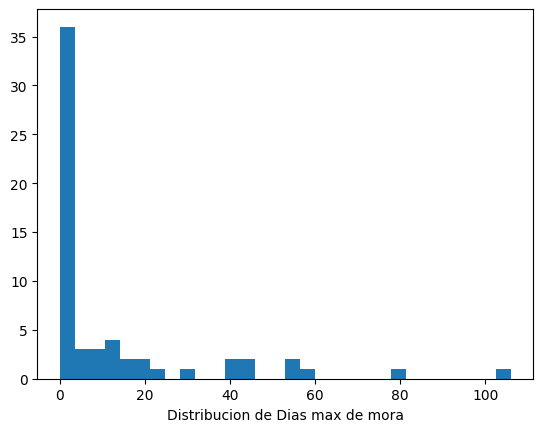

In [ ]:
#realizamos un histograma de los Dias de mora
plt.hist(credit_score['Días Máximos en Mora'], bins= 30)
plt.xlabel('Distribucion de Dias max de mora')
plt.show()

In [ ]:
credit_score.groupby('¿En qué fase se encuentra el emprendimiento?')['Días Máximos en Mora'].mean()

¿En qué fase se encuentra el emprendimiento?
Mi negocio está listo para expandirse      11.72
Tengo mis primeros clientes                10.50
Tengo un segmento abundante de clientes    14.95
Name: Días Máximos en Mora, dtype: float64

## Imputacion de valores faltantes

Dado el tamaño de nuestro conjunto de datos y que tenemos muchos campos vacíos, que no podemos manejar simplemente eliminando las filas respectivas debido a que reducirá significativamente el tamaño del mismo en el test de entrenamiento y tendrá un impacto negativo en el rendimiento del modelo, en su lugar, utilizamos métodos de tratamiento de valores nulos, como reemplazar los valores con la moda.

In [ ]:
#Revision de la cantidad de nulos
credit_score.isnull().sum().sort_values(ascending= False)

Código del Emprendimiento                                                                                                                                                                          63
Emprendimiento                                                                                                                                                                                     61
¿Cómo ves tu emprendimiento en el futuro?                                                                                                                                                          61
¿Cuáles son tus metas a largo plazo?                                                                                                                                                               61
¿Cuál es tu propuesta de valor? ¿Qué beneficios le entregas a tus clientes?                                                                                                                        61
¿Qué te ha

In [ ]:
credit_score['¿Cuántas horas le dedicas a tu emprendimiento?']=credit_score['¿Cuántas horas le dedicas a tu emprendimiento?'].fillna(credit_score['¿Cuántas horas le dedicas a tu emprendimiento?'].dropna().mode().values[0])

En el caso de la pregunta `¿Cuánto ahorras al mes?` se completa los valores faltantes de los registros cuyo `Target` es igual a cero por 'No ahorro' y el resto de los faltantes por la moda que es '5% de mis ingresos'

In [ ]:
credit_score['¿Cuánto ahorras al mes?']=np.where(credit_score['Target'] == 0, 'No ahorro', credit_score['¿Cuánto ahorras al mes?'].fillna('5% de mis ingresos'))

In [ ]:
#Revision de los cambios
credit_score.isnull().sum().sort_values(ascending= False)

Código del Emprendimiento                                                                                                                                                                          63
Emprendimiento                                                                                                                                                                                     61
¿Cómo ves tu emprendimiento en el futuro?                                                                                                                                                          61
¿Cuáles son tus metas a largo plazo?                                                                                                                                                               61
¿Cuál es tu propuesta de valor? ¿Qué beneficios le entregas a tus clientes?                                                                                                                        61
¿Qué te ha

Por ultimo, guardamos la base de datos ya procesada en un archivo Excel

In [ ]:
credit_score.to_excel('credit_score_ML.xlsx', encoding='utf8', index = False)

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
